https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ja#%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%A2%E3%83%87%E3%83%AB%E3%82%92%E6%A7%8B%E7%AF%89%E3%81%99%E3%82%8B

In [32]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(f'TensorFlow version: {tf.__version__}')

TensorFlow version: 2.17.0


- trainデータ
  - X_train: 手書き数字の白黒画像 60,000枚
  - y_train: 手書き数字のラベル 60,000個
- testデータ
  - X_test: 手書き数字の白黒画像 10,000枚
  - y_test: 手書き数字のラベル 10,000個

In [33]:
# data set -> x_train, y_train, x_test, y_test -> normalize
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [34]:
for x in x_train[1]:
    for i in x:
        if i != 0:
            print('o', end=' ')
        else:
            print('-', end=' ')
    print()

- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - o o o o o - - - - - - - - 
- - - - - - - - - - - - - - o o o o o o - - - - - - - - 
- - - - - - - - - - - - - o o o o o o o o o - - - - - - 
- - - - - - - - - - - o o o o o o o o o o o - - - - - - 
- - - - - - - - - - - o o o o o o o o o o o - - - - - - 
- - - - - - - - - - o o o o o o o o o o o o - - - - - - 
- - - - - - - - - o o o o o o o o o - - o o o - - - - - 
- - - - - - - - o o o o o o - - - - - - o o o - - - - - 
- - - - - - - o o o o o o o - - - - - - o o o - - - - - 
- - - - - - - o o o o - - - - - - - - - o o o - - - - - 
- - - - - - - o o o - - - - - - - - - - o o o - - - - - 
- - - - - - o o o o - - - - - - - - - - o o o - - - - - 
- - - - - - o o o o - - - - - - - - o o o o o - - - - - 
- - - - - - o o o - - - - - - -

In [35]:
for y in y_train:
    print(y, end=', ')

5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2, 9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4, 5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9, 9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5, 9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8, 3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5, 2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6, 3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7, 9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9, 6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8, 7, 6, 0, 9, 7, 5, 7, 2, 1, 1, 6, 8, 9, 4, 1, 5, 2, 2, 9, 0, 3, 9, 6, 7, 2, 0, 3, 5, 4, 3, 6, 5, 8

In [36]:
for x in x_test[1]:
    for i in x:
        if i != 0:
            print('o', end=' ')
        else:
            print('-', end=' ')
    print()

- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - o o o o o o o - - - - - - - - - - - 
- - - - - - - - - o o o o o o o o o - - - - - - - - - - 
- - - - - - - - o o o o o o o o o o - - - - - - - - - - 
- - - - - - - o o o o o o - o o o o - - - - - - - - - - 
- - - - - - - o o o o - - - o o o o - - - - - - - - - - 
- - - - - - - - o o - - - - o o o o - - - - - - - - - - 
- - - - - - - - - - - - - o o o o o - - - - - - - - - - 
- - - - - - - - - - - - o o o o o - - - - - - - - - - - 
- - - - - - - - - - - - o o o o - - - - - - - - - - - - 
- - - - - - - - - - - o o o o o - - - - - - - - - - - - 
- - - - - - - - - - o o o o o - - - - - - - - - - - - - 
- - - - - - - - - - o o o o - - - - - - - - - - - - - - 
- - - - - - - - - o o o o o - - - - - - - - - - - - - - 
- - - - - - - - o o o o o - - - - - - - - - - - - - - - 
- - - - - - - - o o o o o - - -

In [37]:
for y in y_test:
    print(y, end=', ')

7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 5

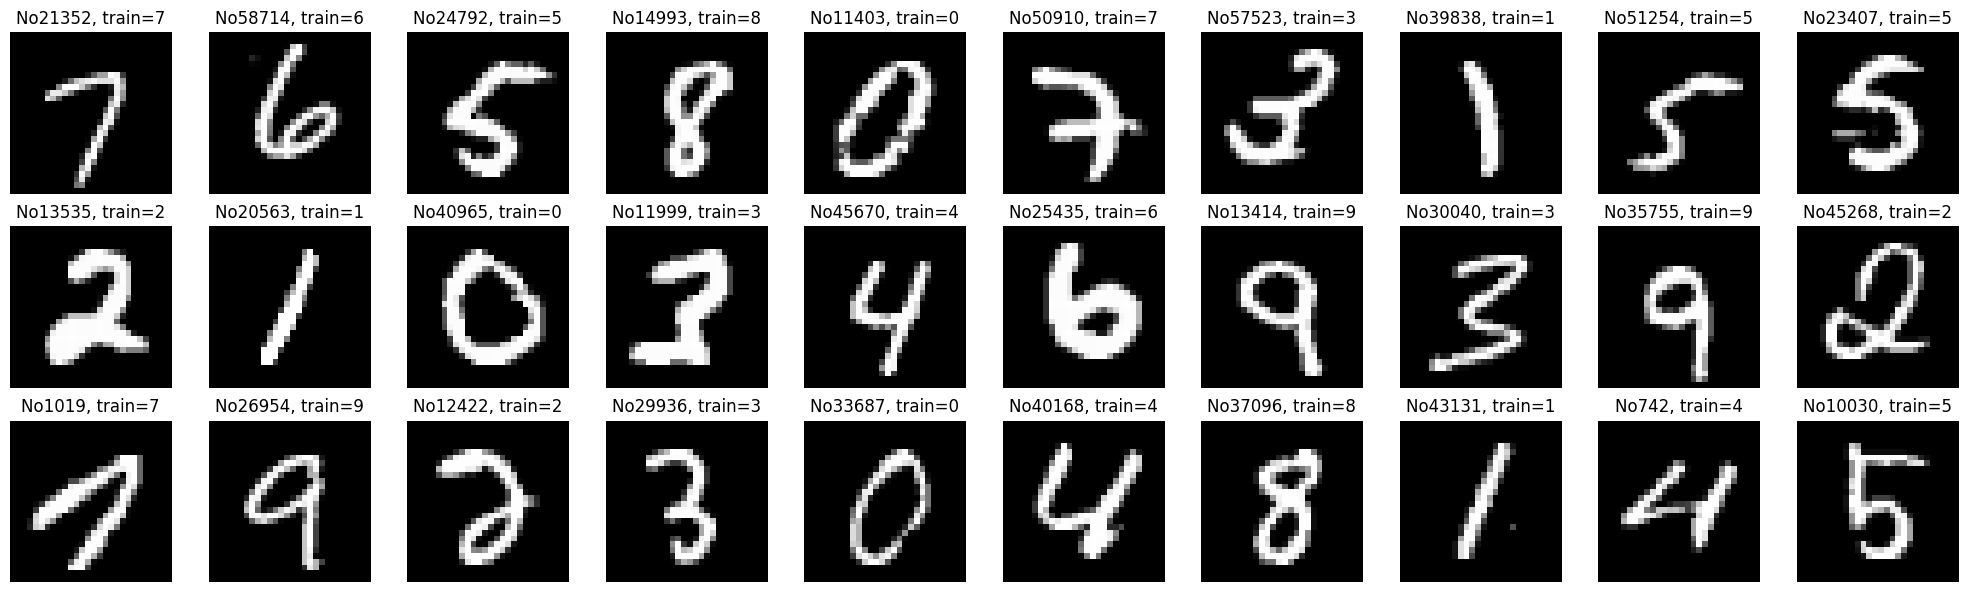

In [38]:
# train data display
row, col = 3, 10
fig, axs = plt.subplots(row, col, figsize=(col*2, row*2))
for i in range(row):
    for j in range(col):
        num = np.random.randint(0, y_train.shape[0])
        axs[i, j].imshow(x_train[num], cmap="gray")
        axs[i, j].set_title(f'No{num}, train={y_train[num]}')
        axs[i, j].axis("off")
plt.tight_layout()
plt.show()

- 損失関数
  - one-hot 表現でラベルが作成されている場合は CategoricalCrossentropy を利用
  - 整数でラベルが作成されている場合は、SparseCategoricalCrossentropy を利用
    - クロスエントロピー誤差
    $$ E = - \sum_k t_k \log y_k $$


In [39]:
BATCH_SIZE = 2**7
EPOCHS = 10

CSV_FILE_PATH = "tensorflow_test_01.csv"
MODEL_FILE_PATH = 'tensorflow_test_01.keras'

In [40]:
# CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10),
])
# model.summary()

# 損失関数
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# モデルの構成とコンパイル
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
# callbacks
callbacks = [tf.keras.callbacks.CSVLogger(CSV_FILE_PATH)]
# トレーニングと評価
history = model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=callbacks,
)
# モデル保存
model.save(MODEL_FILE_PATH)

c:\Users\JY810251\python\blow_prediction\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8054 - loss: 0.6662 - val_accuracy: 0.9434 - val_loss: 0.1908
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9423 - loss: 0.2010 - val_accuracy: 0.9583 - val_loss: 0.1370
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9564 - loss: 0.1497 - val_accuracy: 0.9675 - val_loss: 0.1113
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9663 - loss: 0.1187 - val_accuracy: 0.9713 - val_loss: 0.0984
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9713 - loss: 0.0989 - val_accuracy: 0.9748 - val_loss: 0.0850
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9752 - loss: 0.0817 - val_accuracy: 0.9775 - val_loss: 0.0755
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9774 - loss: 0.0735 - val_accuracy: 0.9778 - val_loss: 0.0733
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9801 - loss: 0.0660 - val_accuracy: 0.

- accuracy : トレーニングデータに対する精度
- loss : トレーニングデータに対する損失
- val_accuracy : 検証データに対する正解率
- val_loss : 検証データに対する損失

In [41]:
# for k, v in history.history.items():
#     print(k, v)

In [42]:
# test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [43]:
df = pd.read_csv(CSV_FILE_PATH)
df.tail(3)

,epoch,accuracy,loss,val_accuracy,val_loss
7,7,0.97958,0.06669,0.97770,0.07417
8,8,0.98153,0.06102,0.97750,0.07133
9,9,0.98233,0.05530,0.97840,0.07222


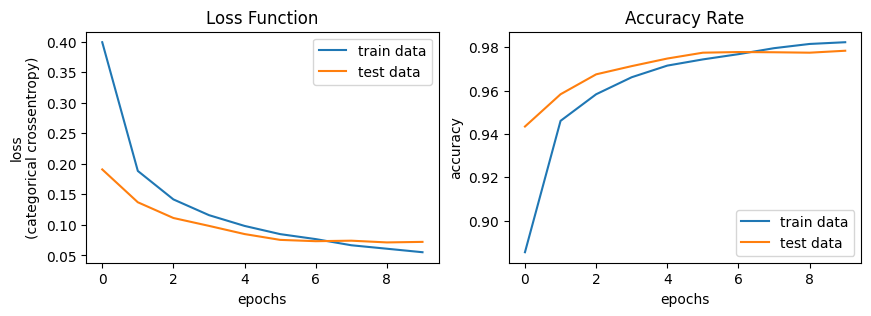

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].plot(df['epoch'], df['loss'], label="train data")
axs[0].plot(df['epoch'], df['val_loss'], label="test data")
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("loss\n(categorical crossentropy)")
axs[0].set_title('Loss Function')
axs[0].legend(loc="upper right")

axs[1].plot(df['epoch'], df['accuracy'], label="train data")
axs[1].plot(df['epoch'], df['val_accuracy'], label="test data")
axs[1].set_xlabel("epochs")
axs[1].set_ylabel("accuracy")
axs[1].set_title('Accuracy Rate')
axs[1].legend(loc="lower right")

plt.show()

In [51]:
# 確率に変換
pd.options.display.float_format = '{:.05f}'.format
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
df_prob = pd.DataFrame(probability_model(x_test))
df_prob['prob'] = df_prob.iloc[:, 0:10].idxmax(axis=1)
df_prob['y_test'] = y_test
df_prob.head(3)

,0,1,2,3,4,5,6,7,8,9,prob,y_test
0,0.00000,0.00000,0.00002,0.00022,0.00000,0.00000,0.00000,0.99973,0.00000,0.00003,7,7
1,0.00000,0.00006,0.99994,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2,2
2,0.00000,0.99828,0.00076,0.00002,0.00008,0.00002,0.00002,0.00026,0.00055,0.00000,1,1


In [52]:
# 予測が異なる数
df_prob[df_prob['prob'] != df_prob['y_test']].count()[0]

216

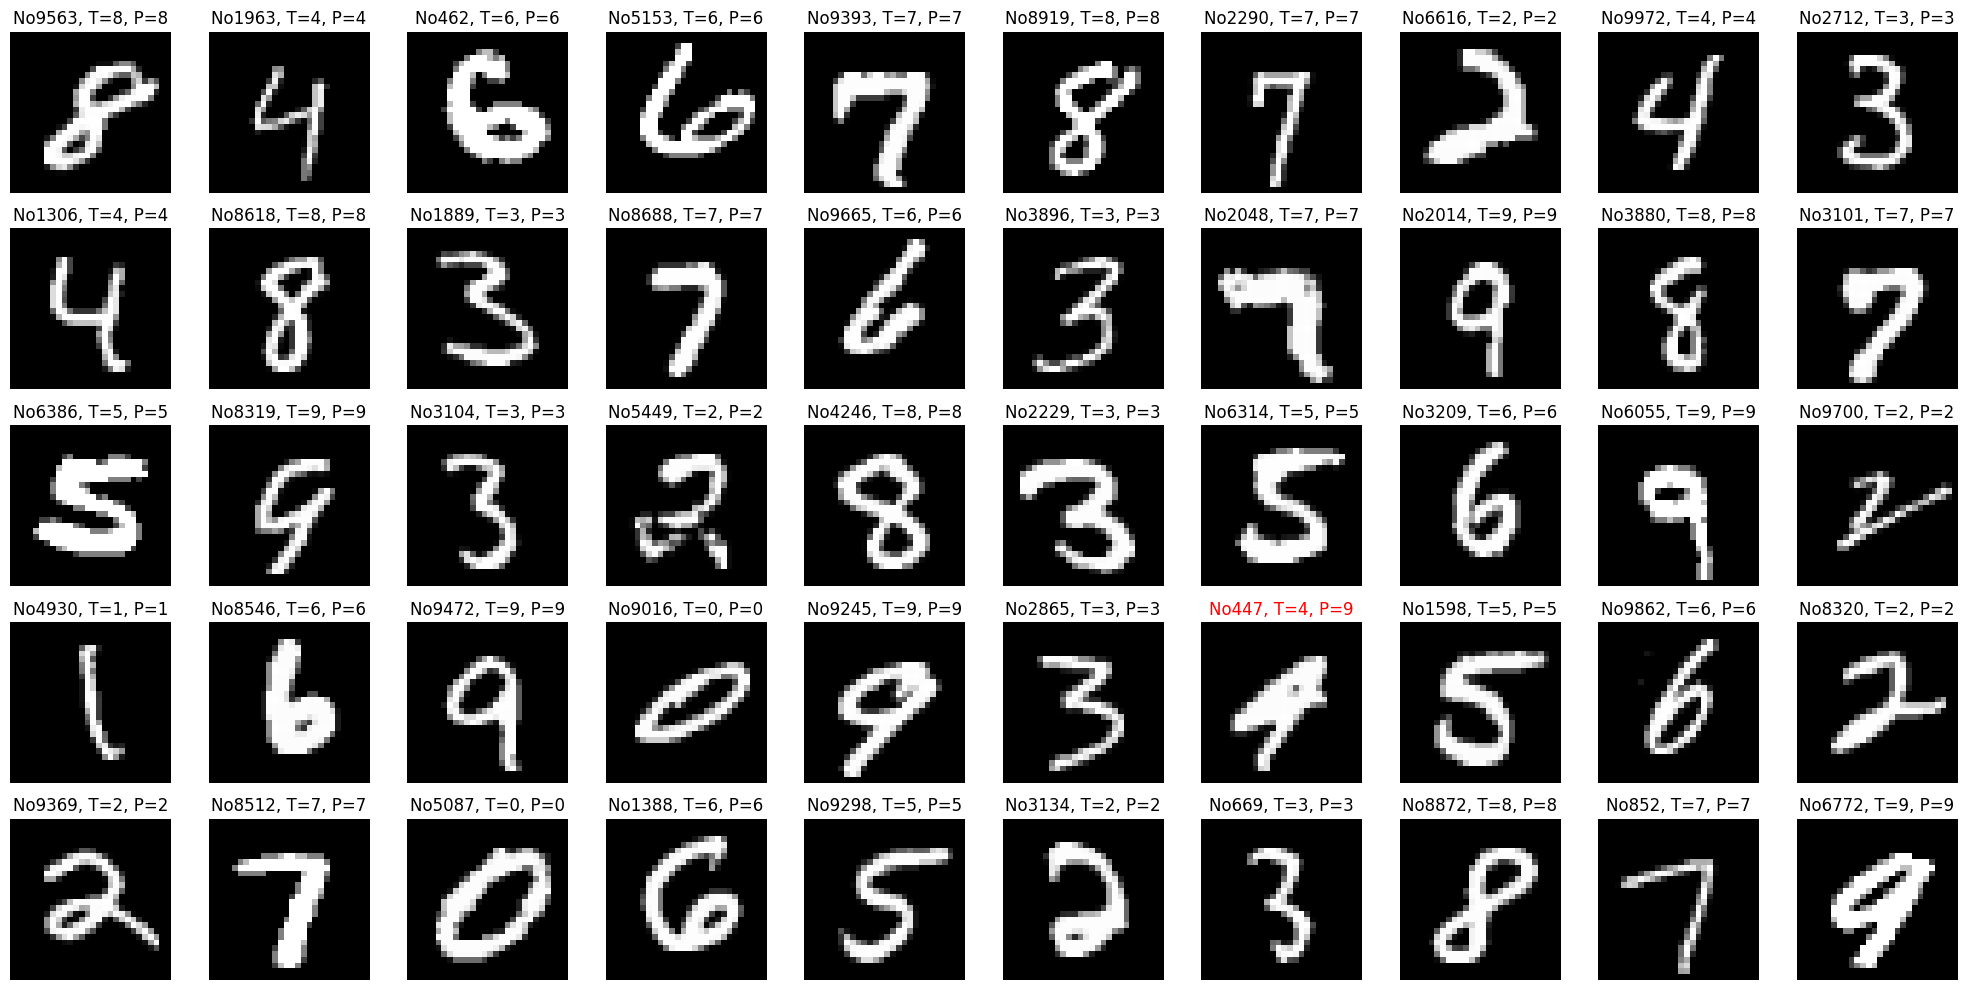

In [47]:
# 50枚ランダムに確認
row, col = 5, 10
fig, axs = plt.subplots(row, col, figsize=(col*2, row*2))
for i in range(row):
    for j in range(col):
        num = np.random.randint(10000)
        axs[i][j].imshow(x_test[num], cmap="gray")
        pred = df_prob.iloc[num, :-2].idxmax()
        y_ = y_test[num]
        axs[i][j].set_title(f'No{num}, T={y_}, P={pred}')
        if pred != y_:
            axs[i][j].set_title(f'No{num}, T={y_}, P={pred}', color='r')
        axs[i][j].axis('off')
plt.tight_layout()
plt.show()